# Feature Attribution on Eight Experiments comparing ProtoShotXAI, Grad-CAM, DeepShap Expected Gradients (SHAP), and LIME
TODO: Add examples from the other models, make plotting function for display


## Initialization, loading model and data

### Imports

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
import pickle

from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from keras.datasets import mnist

from architectures.protoshotxai import ProtoShotXAI
from utils.ploting_function import xai_plot

### Get Base Model to be Explained (i.e., pretrained conv MNIST model)

In [2]:
model_path_pretrained = '../trained_models/pretrained_conv_mnist/'
base_model = load_model(model_path_pretrained)

### Load support data and query sample eight

In [12]:
#Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train,axis = 3)/255
query = np.expand_dims(x_train[3029],axis=0)
n_classes = 10

## ProtoShotXAI

### Load ProtoShotXAI class and set number of of sample for prototype (e.g.,100)

In [4]:
protoshot = ProtoShotXAI(base_model)
shot = 100

### Loop through all the classes and run image feature attribution

In [19]:
ref_pixel = [0]
protoshot_attributions = np.zeros((10,np.shape(query)[1],np.shape(query)[2]))
for iclass in range(n_classes):
    print(f'class: {iclass}')
    #Get N shot random sample from class iclass
    support_data = x_train[y_train == iclass]
    support_data = support_data[np.random.permutation(support_data.shape[0])[:shot]]
    #Run protoshotXAI feature attribution
    protoshot_attributions[iclass,:,:] = protoshot.image_feature_attribution(support_data, query, iclass, ref_pixel, pad=1)

class: 0


100%|██████████| 28/28 [00:00<00:00, 142.22it/s]


class: 1


100%|██████████| 28/28 [00:00<00:00, 141.79it/s]


class: 2


100%|██████████| 28/28 [00:00<00:00, 141.31it/s]


class: 3


100%|██████████| 28/28 [00:00<00:00, 141.11it/s]


class: 4


100%|██████████| 28/28 [00:00<00:00, 140.66it/s]


class: 5


100%|██████████| 28/28 [00:00<00:00, 141.26it/s]


class: 6


100%|██████████| 28/28 [00:00<00:00, 141.01it/s]


class: 7


100%|██████████| 28/28 [00:00<00:00, 141.38it/s]


class: 8


100%|██████████| 28/28 [00:00<00:00, 141.34it/s]


class: 9


100%|██████████| 28/28 [00:00<00:00, 141.19it/s]


## Image Plotting

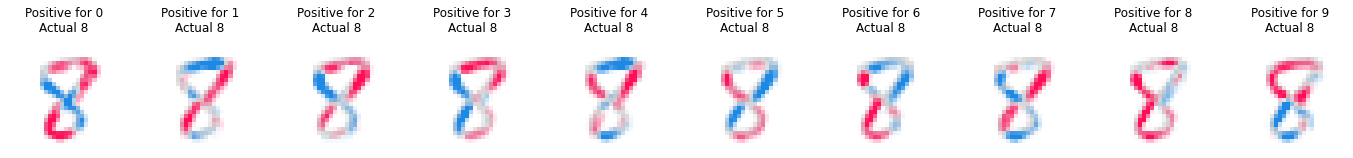

In [21]:
import matplotlib.pyplot as plt
import utils.shap_color_scheme.colors as colors

abs_vals = np.abs(protoshot_attributions).flatten()
max_val = np.nanpercentile(abs_vals, 98)
fig, m_axs = plt.subplots(1,10, figsize = (24,3))
for i, c_ax in enumerate(m_axs.flatten()):
    abs_vals = np.abs(protoshot_attributions[i]).flatten()
    max_val = np.nanpercentile(abs_vals, 98)
    c_ax.imshow(1-query[0], interpolation = 'nearest', cmap='gray', alpha=0.15)
    im = c_ax.imshow(protoshot_attributions[i], cmap=colors.red_transparent_blue, vmin=-max_val, vmax=max_val)
    c_ax.set_title('Positive for {}\nActual {}'.format(i, 8))
    c_ax.axis('off')
plt.savefig('./results/Eight_feature_attribution/ProtoShotXAI_Feature_Attibution_8.png',dpi=450)